In [2]:
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics
import sklearn.model_selection
%matplotlib inline

In [3]:
# Reading the data from file
col_names = []
for i in range(20):
    if i == 0:
        col_names.append('quality')
    if i == 1:
        col_names.append('prescreen')
    if i >= 2 and i <= 7:
        col_names.append('ma' + str(i))
    if i >= 8 and i <= 15:
        col_names.append('exudate' + str(i))
    if i == 16:
        col_names.append('euDist')
    if i == 17:
        col_names.append('diameter')
    if i == 18:
        col_names.append('amfm_class')
    if i == 19:
        col_names.append('label')

data = pd.read_csv("messidor_features.txt", names = col_names)
print(data.shape)
data.head(10)

(1151, 20)


,quality,prescreen,ma2,ma3,ma4,ma5,ma6,ma7,exudate8,exudate9,exudate10,exudate11,exudate12,exudate13,exudate14,exudate15,euDist,diameter,amfm_class,label
0,1,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1
5,1,1,44,43,41,41,37,29,28.356400,6.935636,2.305771,0.323724,0.000000,0.000000,0.000000,0.000000,0.502831,0.126741,0,1
6,1,0,29,29,29,27,25,16,15.448398,9.113819,1.633493,0.000000,0.000000,0.000000,0.000000,0.000000,0.541743,0.139575,0,1
7,1,1,6,6,6,6,2,1,20.679649,9.497786,1.223660,0.150382,0.000000,0.000000,0.000000,0.000000,0.576318,0.071071,1,0
8,1,1,22,21,18,15,13,10,66.691933,23.545543,6.151117,0.496372,0.000000,0.000000,0.000000,0.000000,0.500073,0.116793,0,1
9,1,1,79,75,73,71,64,47,22.141784,10.054384,0.874633,0.099780,0.023386,0.000000,0.000000,0.000000,0.560959,0.109134,0,1


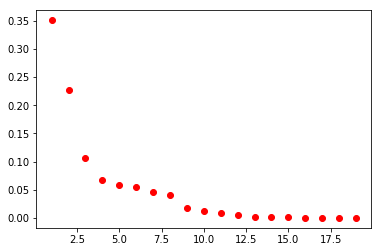

In [4]:
scaler = StandardScaler()
#data.head(2)
x = data.drop('label', axis=1)
x = scaler.fit_transform(x)
y = data['label']
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.75, test_size=0.25)

x_ax = []
y_ax= []
for i in range(1, 20):
    x_ax.append(i)
pca = PCA(n_components=19)
X_new = pca.fit_transform(X_train)
X_test_new = pca.transform(X_test)

plt.plot(x_ax, pca.explained_variance_ratio_, 'ro')
plt.show()

In [5]:
clf = DecisionTreeClassifier(criterion="entropy", min_impurity_decrease=0.01, min_samples_leaf=0.03, min_samples_split=0.07)
clf.fit(X_train, Y_train)
Y_predict = clf.predict(X_test)
print("Accuracy: " + str(sklearn.metrics.accuracy_score(Y_test, Y_predict)))
print("Precision: " + str(sklearn.metrics.precision_score(Y_test, Y_predict)))
print ("Recall: " + str(sklearn.metrics.recall_score(Y_test, Y_predict)))


Accuracy: 0.614583333333
Precision: 0.642857142857
Recall: 0.596026490066


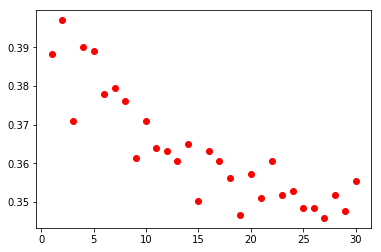

K = 27
Accuracy: 0.654190404798
Precision: 0.734693877551
Recall: 0.590163934426



In [6]:
from sklearn.neighbors import KNeighborsClassifier
skf = sklearn.model_selection.StratifiedKFold(n_splits=10)

k_values = []
misclassification_values = []
topAccuracy = 0
topRecall = 0
topPrecision = 0
topK = 0
for k in range(1, 31):
    avg_accuracy = 0
    for train_index, test_index in skf.split(x, y):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = x[train_index], x[test_index]
        Y_train, Y_test = y[train_index], y[test_index]
        
        
        neigh = KNeighborsClassifier(n_neighbors=k)
        neigh.fit(X_train, Y_train)
        Y_predict = neigh.predict(X_test)
        avg_accuracy += sklearn.metrics.accuracy_score(Y_test, Y_predict)
    
    accuracy = avg_accuracy/10
    #Add to graph
    k_values.append(k)
    misclassification_values.append(1-accuracy)
    if accuracy > topAccuracy:
        topK = k
        topAccuracy = accuracy
        topRecall = sklearn.metrics.recall_score(Y_test, Y_predict)
        topPrecision = sklearn.metrics.precision_score(Y_test, Y_predict)

plt.plot(k_values, misclassification_values, 'ro')       
plt.show()
print("K = " + str(topK))
print("Accuracy: " + str(topAccuracy))
print("Precision: " + str(topPrecision))
print ("Recall: " + str(topRecall) + "\n")


In [7]:
from sklearn.naive_bayes import GaussianNB

X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.75, test_size=0.25)
clf = GaussianNB()
clf.fit(X_train, Y_train)
Y_predict = clf.predict(X_test)
print("Accuracy: " + str(sklearn.metrics.accuracy_score(Y_test, Y_predict)))
print("Precision: " + str(sklearn.metrics.precision_score(Y_test, Y_predict)))
print ("Recall: " + str(sklearn.metrics.recall_score(Y_test, Y_predict)))

Accuracy: 0.642361111111
Precision: 0.703703703704
Recall: 0.674556213018


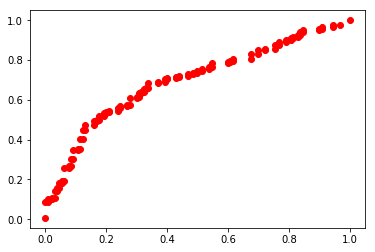

In [8]:
from sklearn import svm

X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.75, test_size=0.25)
clf = svm.SVC(kernel="poly", degree=5, probability=True)
clf.fit(X_train, Y_train)

probs = clf.predict_proba(X_test)

prob_Pos = []
for pair in probs:
    prob_Pos.append(pair[1])
fpr, tpr, thresholds = sklearn.metrics.roc_curve(Y_test, prob_Pos, pos_label=1)
plt.plot(fpr, tpr, 'ro')       
plt.show()

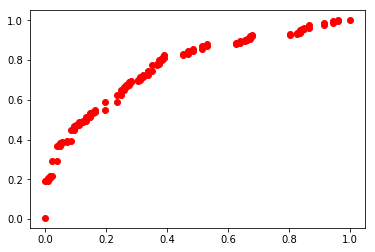

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.75, test_size=0.25)
clf = svm.SVC(kernel="rbf", degree=5, probability=True)
clf.fit(X_train, Y_train)
probs = clf.predict_proba(X_test)
prob_Pos = []
for pair in probs:
    prob_Pos.append(pair[1])
fpr, tpr, thresholds = sklearn.metrics.roc_curve(Y_test, prob_Pos, pos_label=1)
plt.plot(fpr, tpr, 'ro')       
plt.show()

In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

skf = sklearn.model_selection.StratifiedKFold(n_splits=10)
params = {
    'activation': ['logistic', 'tanh', 'relu'],
    'learning_rate': ['constant', 'adaptive'],
    'momentum': [0.9],
    'hidden_layer_sizes':[(5, ),  (30, ), (55, ), (60,)]
}

mlp = MLPClassifier()
clf = GridSearchCV(mlp, param_grid=params, cv=sklearn.model_selection.StratifiedKFold(n_splits=10)).fit(X_train, Y_train)
Y_predict = clf.predict(X_test)
print("Accuracy: " + str(sklearn.metrics.accuracy_score(Y_test, Y_predict)))
print("Precision: " + str(sklearn.metrics.precision_score(Y_test, Y_predict)))
print ("Recall: " + str(sklearn.metrics.recall_score(Y_test, Y_predict)))

Accuracy: 0.725694444444
Precision: 0.783216783217
Recall: 0.7


In [11]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.75, test_size=0.25)

clf = RandomForestClassifier(max_depth=12, random_state=0)
clf.fit(X_train, Y_train)
Y_predict = clf.predict(X_test)
print("Accuracy: " + str(sklearn.metrics.accuracy_score(Y_test, Y_predict)))
print("Precision: " + str(sklearn.metrics.precision_score(Y_test, Y_predict)))
print ("Recall: " + str(sklearn.metrics.recall_score(Y_test, Y_predict)))

Accuracy: 0.642361111111
Precision: 0.664335664336
Recall: 0.633333333333


In [12]:
# ANY MORE CLASSIFIERS TO ADD
from sklearn.ensemble import AdaBoostClassifier

X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.75, test_size=0.25)
bases_names = ["Gaussian NB", "Decision Tree Classifier"]
bases = [GaussianNB(), DecisionTreeClassifier()]
for base_name, base in zip(bases_names, bases):
    clf = AdaBoostClassifier(base_estimator=base)
    clf.fit(X_train, Y_train)
    Y_predict = clf.predict(X_test)
    print(base_name)
    print("Accuracy: " + str(sklearn.metrics.accuracy_score(Y_test, Y_predict)))
    print("Precision: " + str(sklearn.metrics.precision_score(Y_test, Y_predict)))
    print ("Recall: " + str(sklearn.metrics.recall_score(Y_test, Y_predict)) + "\n") 

Gaussian NB
Accuracy: 0.527777777778
Precision: 0.529616724739
Recall: 0.993464052288

Decision Tree Classifier
Accuracy: 0.614583333333
Precision: 0.643835616438
Recall: 0.614379084967

